Utility score for Heuristic: 0.9661
Utility score for JW: 0.9685
Utility score for Naive: 0.9573


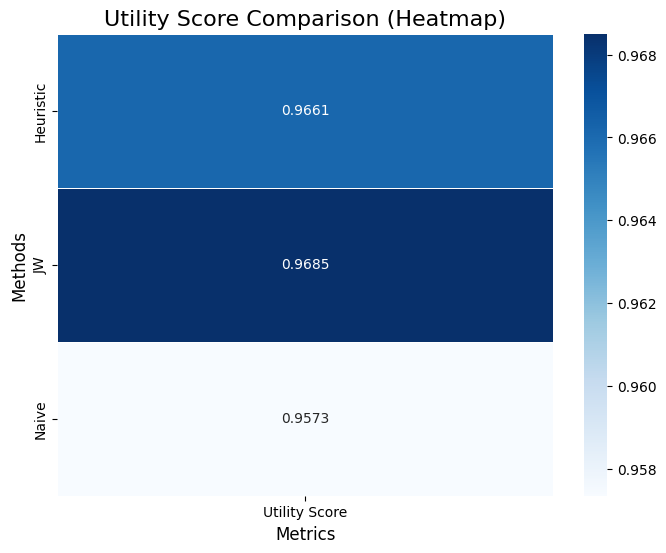

In [14]:
# Import library yang diperlukan
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Fungsi untuk membaca dataset
def load_dataset(file_path):
    with open(file_path, 'r') as file:
        data = [set(line.strip().split()) for line in file]
    return data

# Lokasi file berdasarkan nama file yang telah diunggah
original_file = 'transaction.txt'  # Dataset asli
modified_files = {
    "Heuristic": 'heuristic_transaction2.txt',
    "JW": 'jw_transaction.txt',
    "Naive": 'Naive_transaction2.txt'
}

# Load dataset asli
original_data = load_dataset(original_file)

# Fungsi untuk menghitung utility berdasarkan rumus yang diberikan
def calculate_utility(original, modified):
    numerator = sum(len(o & m) for o, m in zip(original, modified))
    denominator = sum(len(o | m) for o, m in zip(original, modified))
    return numerator / denominator

# Hitung utility untuk setiap dataset modifikasi
utility_scores = {}
for method, file_path in modified_files.items():
    modified_data = load_dataset(file_path)
    utility = calculate_utility(original_data, modified_data)
    utility_scores[method] = utility

# Cetak hasil utility untuk setiap metode
for method, score in utility_scores.items():
    print(f"Utility score for {method}: {score:.4f}")

# Visualisasi hasil menggunakan heatmap
methods = list(utility_scores.keys())
scores = list(utility_scores.values())

# Siapkan data untuk heatmap
df = pd.DataFrame({'Method': methods, 'Utility Score': scores}).set_index('Method')

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df, annot=True, cmap="Blues", cbar=True, fmt=".4f", linewidths=0.5)
plt.title('Utility Score Comparison (Heatmap)', fontsize=16)
plt.xlabel('Metrics', fontsize=12)
plt.ylabel('Methods', fontsize=12)

# Tampilkan heatmap
plt.show()
